False


0.5139942002510158

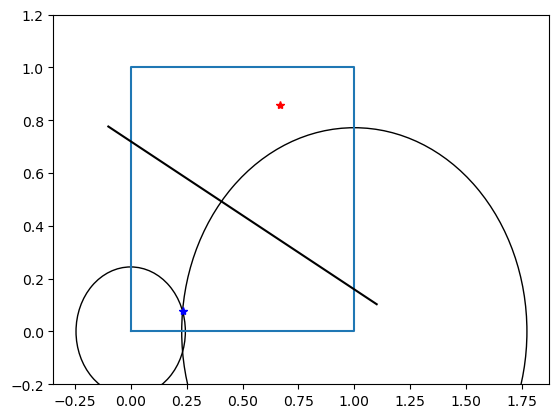

In [122]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Demo with Plots!!
# focus on triangle
xb = random.uniform(0,0.5)
yb = random.uniform(0,0.5)
xb, yb = (xb, yb) if xb >= yb else (yb, xb)

xr = random.uniform(0,1)
yr = random.uniform(0,1)

b = (yr**2 - yb**2 + xr**2 - xb**2)/(2 * (yr - yb))
m = - (xr - xb) / (yr - yb)

equix = lambda x: m*x + b
equiy = lambda y: (y-b)/m

fig, ax = plt.subplots()

circle1 = plt.Circle((0,0), np.sqrt(xb**2 + yb**2), fill=False)
circle2 = plt.Circle((1,0), np.sqrt((1-xb)**2 + yb**2), fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)

# THE BOX
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0])

# red point
plt.plot(xr, yr, "r*"), 

# blue point
plt.plot(xb, yb, "b*"), 

# plot line
xrange = np.arange(-0.1, 1.2, 0.1)
plt.plot(xrange, equix(xrange), "k")
plt.ylim([-0.2,1.2])

# edges
# if abs(yb) < xb:
#     print("right")
#     cond = -1 < m + b < 1
# elif abs(yb) < -xb:
#     print("left")
#     cond = -1 < -m + b < 1 
# elif abs(xb) < yb:
#     print("top")
#     cond = -1 < (1-b)/m < 1
# elif abs(xb) < -yb:
#     print("bottom")
#     cond = -1 < (-1-b)/m < 1
# print(cond)

# modified so it should always be on the bottom
cond = 0 < -b/m < 1
print(cond)
def shaded(x, y):
    theta = 2*np.arctan2(y,x)
    return 0.25 * (x**2 + y**2) * (np.pi + np.sin(theta) - theta)
a = lambda x,y: shaded(x,y) + shaded(1-x, y)
a(xb, yb)

In [82]:
# From running besidesthepoint.py
successes = 32645598036341
trials = 66432800000000
successes/trials

# looks like this approach isn't going to work though, for 10 decimal precision at 95% confidence I would need to run this for 18,000 years

0.4914078292099836

In [13]:
# Can probably squeeze out a bit more efficiency with the array operations (see the below math), but don't think it will be significant
from sympy import pprint, symbols, simplify

# Define the symbols
yr, yb, xr, xb = symbols('yr yb xr xb')

# Define the expressions
b = (yr**2 - yb**2 + xr**2 - xb**2) / (2 * (yr - yb))
m = -(xr - xb) / (yr - yb)

squares = xb**2 - xr**2 + yb**2 - yr**2
dx = 2 * (xb - xr)
dy = 2 * (yb - yr)

# Simplify the expressions
pprint(simplify(b+m))
pprint(simplify(b-m))
pprint(simplify((1-b)/m))
pprint(simplify((-1-b)/m))

squares = xb**2 - xr**2 + yb**2 - yr**2
dx = 2 * (xb - xr)
dy = 2 * (yb - yr)

# in terms of slope and y intercept
a = (b+m, b-m, (1-b)/m, (-1-b)/m)

# in terms of squares and deltas
b = ((squares - dx)/dy, (squares + dx)/dy, (squares - dy)/dx, (squares + dy)/dx)

for i,j in zip(a,b):
    print(simplify(i) == simplify(j))

  2            2            2     2
xb  - 2⋅xb - xr  + 2⋅xr + yb  - yr 
───────────────────────────────────
            2⋅(yb - yr)            
  2            2            2     2
xb  + 2⋅xb - xr  - 2⋅xr + yb  - yr 
───────────────────────────────────
            2⋅(yb - yr)            
  2     2     2            2       
xb  - xr  + yb  - 2⋅yb - yr  + 2⋅yr
───────────────────────────────────
            2⋅(xb - xr)            
  2     2     2            2       
xb  - xr  + yb  + 2⋅yb - yr  - 2⋅yr
───────────────────────────────────
            2⋅(xb - xr)            
True
True
True
True


Initially I made this expression

$8 \int_0^{\frac{1}{2}} \int_0^{x} \left( \int_0^x  \sqrt{x^2 + y^2 - z^2} \, dz + \int_{x-1}^1 \sqrt{(x-1)^2 + y^2 - (z-1)^2} \, dz \right) \, dy \, dx
$

But after flipping the circle, it looks a little simpler

$8 \int_0^{\frac{1}{2}} \int_0^x \left( \int_0^x \sqrt{x^2 + y^2 - z^2} \, dz + \int_0^{1 - x} \sqrt{(1 - x)^2 + y^2 - z^2} \, dz \right) dy \, dx
$

In [19]:
# New approach - solving this integral should give us an exact answer. Tried this - doesn't work
from sympy import integrate, sqrt, N

x, y, z = symbols('x y z')

integrand1 = sqrt(x**2 + y**2 - z**2)
integrand2 = sqrt((1-x)**2 + y**2 - z**2)

# neither of these work

# 8 * integrate(integrate(integrate(integrand1, (z, 0, x)) + integrate(integrand2, (z, 0, 1-x)), (y, 0, x)), (x, 0, 1/2))

# N(8 * integrate(integrate(integrate(integrand1, (z, 0, x)) + integrate(integrand2, (z, 0, 1-x)), (y, 0, x)), (x, 0, 1/2)))

KeyboardInterrupt: 

In [3]:
from scipy import LowLevelCallable, integrate
import ctypes
import numpy as np
# Define the integrands as a Python functions - this is slow

# integrand1 = lambda x,y,z: np.sqrt(x**2 + y**2 -z**2)
# integrand2 = lambda x,y,z: np.sqrt((1-x)**2 + y**2 -z**2)

# Define C functions and call those instead

# run this to generate .so file from integrand.c
# gcc -shared -fPIC -o integrand.so integrand.c

lib = ctypes.CDLL("integrand.so")
lib.integrand1.restype = ctypes.c_double
lib.integrand2.restype = ctypes.c_double

lib.integrand1.argtypes = (ctypes.c_int, ctypes.POINTER(ctypes.c_double))
lib.integrand2.argtypes = (ctypes.c_int, ctypes.POINTER(ctypes.c_double))

integrand1 = LowLevelCallable(lib.integrand1)
integrand2 = LowLevelCallable(lib.integrand2)

xbounds = lambda: [0, 0.5]
ybounds = lambda x: [0, x]
zbounds1 = lambda x,y: [0, x]
zbounds2 = lambda x,y: [0, 1-x]

integral1, err1 = integrate.nquad(integrand1, [zbounds1, ybounds, xbounds])
integral2, err2 = integrate.nquad(integrand2, [zbounds2, ybounds, xbounds])

res = 8 * (integral1 + integral2)
err = err1 + err2

/opt/anaconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [128]:
# after some more analysis, let's use analytic solutions for the first integrals of integrand1 and integrand2
# area of the shaded circle area is:

# shaded = lambda x,y : 0.25 * (x**2 + y**2) * (np.pi - 2*np.atan2(y,x) + np.sin(2*np.atan2(y,x)))

def shaded(x, y):
    theta = 2*np.arctan2(y,x)
    r2 = x**2 + y**2
    return 0.5 * r2 * (0.5*np.pi + np.sin(theta) - theta)
    

res1, _ = integrate.dblquad(lambda x, y: 0.25 * (np.pi * (x**2 + y**2)), 0, 0.5, lambda x: 0, lambda x: x)
res2, _ = integrate.dblquad(lambda x, y: 0.25 * (np.pi * ((1-x)**2 + y**2)), 0, 0.5, lambda x: 0, lambda x: x)
res3, _ = integrate.dblquad(lambda x, y: 0.5 * (x**2 + y**2) * (2*np.arctan2(y,x) - np.sin(2*np.arctan2(y,x))), 0, 0.5, lambda x: 0, lambda x: x)
res4, _ = integrate.dblquad(lambda x, y: 0.5 * ((1-x)**2 + y**2) * (2*np.arctan2(y,(1-x)) - np.sin(2*np.arctan2(y,(1-x)))), 0, 0.5, lambda x: 0, lambda x: x)

2*np.pi*(res1 + res2 - res3 - res4)
# why doesn't this work!!

0.0818123086872342

In [76]:
successes = 32645598036341
trials = 66432800000000
successes/trials

0.4914078292099836

In [132]:
from sympy import symbols, integrate, pi, atan2, sin

# Define symbols
x, y = symbols('x y')

# Define theta and r2
theta = 2 * atan2(y, x)
r2 = x**2 + y**2

# Define the shaded function
shaded = 0.5 * r2 * (0.5 * pi + sin(theta) - theta)
integrand = shaded.simplify()

# Perform the double integration with bounds
# First integrate with respect to y from 0 to x, then with respect to x from 0 to 0.5
result_sympy = integrate(integrate(integrand, (y, 0, x)), (x, 0, 0.5))
8*result_sympy.evalf()  # Evaluate the result numerically for comparison


0.112214465856664